<a href="https://colab.research.google.com/github/ziedjouini/Data_Projects/blob/main/Copie_de_Livecoding_Telco_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/murpi/wilddata/master/quests/churn_telecom.csv")

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Yes
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Fiber optic,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
len(df.drop_duplicates())

7043

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
len(df[df['Churn']=='Yes'].index)/len(df.index)
#Taux d'attrition est égal à 31%

0.31506460315206586

In [ ]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- customerID ---
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
---- gender ---
Male      3555
Female    3488
Name: gender, dtype: int64
---- SeniorCitizen ---
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
---- Partner ---
No     3641
Yes    3402
Name: Partner, dtype: int64
---- Dependents ---
No     4933
Yes    2110
Name: Dependents, dtype: int64
---- tenure ---
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
---- PhoneService ---
Yes    6361
No      682
Name: PhoneService, dtype: int64
---- MultipleLines ---
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
---- InternetService ---
Fiber optic    3596
DSL            1921
No             1526
Name

In [ ]:
# Libraire permettant une analyse descriptive deu Dataset !
#!pip install ydata-profiling
#import ydata_profiling
#ydata_profiling.ProfileReport(df)

In [ ]:
pd.to_numeric(df['TotalCharges'],downcast="float")

ValueError: ignored

In [ ]:
df.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                   Fiber optic
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                     Yes
Name: 488, dtype: object

In [ ]:
df = df[df['TotalCharges'] != " "]
df["TotalCharges"] = pd.to_numeric(df['TotalCharges'],downcast="float")

<ipython-input-13-083835ecfc78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TotalCharges"] = pd.to_numeric(df['TotalCharges'],downcast="float")


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
(len(df[df["Churn"] == "Yes"]) / len(df))

0.31427758816837315

In [ ]:
for column in ['Partner',	'Dependents',	'PhoneService',	'PaperlessBilling', "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"] :
  df[f'{column}'] = df[column].apply(lambda x : 1 if x == 'Yes' else 0)

df['gender'] = df['gender'].apply(lambda x : 1 if x == 'Female' else 0)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,No phone service,Fiber optic,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.850000,Yes
1,5575-GNVDE,0,0,0,0,34,1,No,Fiber optic,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.500000,No
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.150002,Yes
3,7795-CFOCW,0,0,0,0,45,0,No phone service,Fiber optic,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.750000,No
4,9237-HQITU,1,0,0,0,2,1,No,DSL,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24,1,Yes,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.500000,No
7039,2234-XADUH,1,0,1,1,72,1,Yes,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.899902,No
7040,4801-JZAZL,1,0,1,1,11,0,No phone service,Fiber optic,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.450012,No
7041,8361-LTMKD,0,1,1,0,4,1,Yes,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.600006,Yes


In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse = False, handle_unknown = "ignore")

# Explications
#

ohe.fit(df[["MultipleLines", "InternetService", "Contract", "PaymentMethod"]])


OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
ohe.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_No', 'x0_No phone service', 'x0_Yes', 'x1_DSL',
       'x1_Fiber optic', 'x1_No', 'x2_Month-to-month', 'x2_One year',
       'x2_Two year', 'x3_Bank transfer (automatic)',
       'x3_Credit card (automatic)', 'x3_Electronic check',
       'x3_Mailed check'], dtype=object)

In [ ]:
df[ohe.get_feature_names(["MultipleLines", "InternetService", "Contract", "PaymentMethod"])] = ohe.transform(df[["MultipleLines", "InternetService", "Contract", "PaymentMethod"]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,1,0,No phone service,Fiber optic,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.850000,Yes,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5575-GNVDE,0,0,0,0,34,1,No,Fiber optic,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.500000,No,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.150002,Yes,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7795-CFOCW,0,0,0,0,45,0,No phone service,Fiber optic,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.750000,No,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,9237-HQITU,1,0,0,0,2,1,No,DSL,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.649994,Yes,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24,1,Yes,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.500000,No,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,2234-XADUH,1,0,1,1,72,1,Yes,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.899902,No,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,4801-JZAZL,1,0,1,1,11,0,No phone service,Fiber optic,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.450012,No,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,8361-LTMKD,0,1,1,0,4,1,Yes,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.600006,Yes,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df["Churn"] = df["Churn"].map({"Yes": 1,
                               "No": 0})

In [ ]:
df.isnull().sum()

customerID                                 0
gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
InternetService                            0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
Contract                                   0
PaperlessBilling                           0
PaymentMethod                              0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
MultipleLines_No                           0
MultipleLi

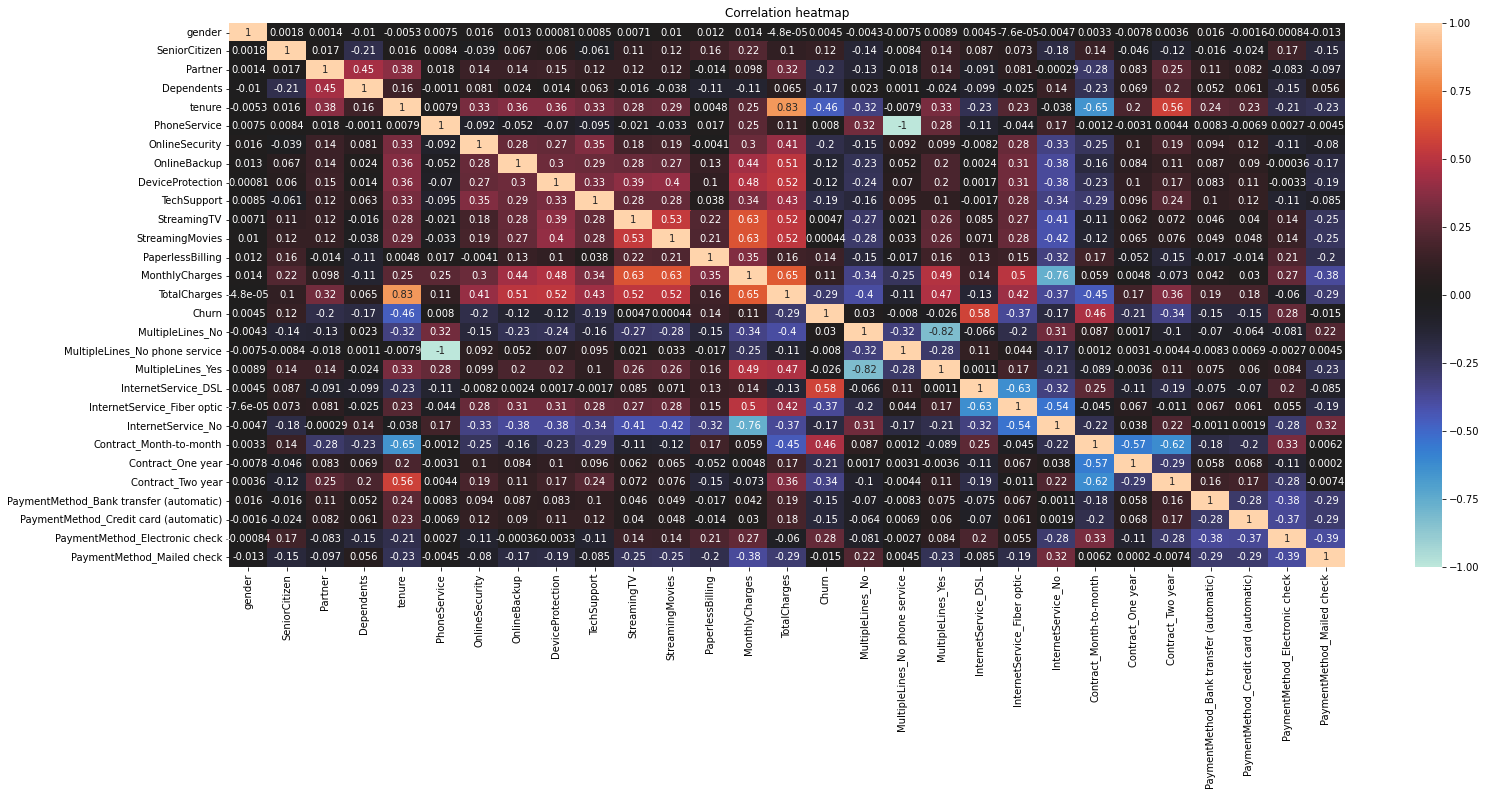

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df.corr()

plt.figure(figsize=(25, 10))
sns.heatmap(df_corr, annot=True, center = 0, vmax = 1, vmin = -1)
plt.title('Correlation heatmap');

# The IBM sample data set website gives the following data dicitionary, or description of the variables:

customerID: Customer ID

genderCustomer: gender (female, male)

SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)

Partner : Whether the customer has a partner or not (Yes, No)

Dependents: Whether the customer has dependents or not (Yes, No)

tenure: Number of months the customer has stayed with the company

PhoneService: Whether the customer has a phone service or not (Yes, No)

MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService: Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract: The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)

PaymentMethod: The customer’s payment method (Electronic check, Mailed check,
Bank transfer (automatic), Credit card (automatic))

MonthlyCharges: The amount charged to the customer monthly

TotalCharges: The total amount charged to the customer

Churn: Whether the customer churned or not (Yes or No)

# Observations
* Il n'y a pas de corrélations entre quelconque variable explicative `X` et `y`, c'est à dire "churn".
#### `TotalCharges`
* On observe une corrélation positive (> 80%) entre "TotalCharges" et "Tenure". En effet, il paraît logique que plus un client reste longtemps, plus il aura des frais élevés.
* En ce qui concerne le montant des frais payés par les clients, on observe également que les clients ayant un service optionnel ["OnlineBackup", "DeviceProtection"...] payent plus de frais. Aussi, les clients ayant un contrat "Month-to-Month" ont moins de frais. On en déduit que le "Month-to-month" Contract incite les clients à rester moins longtemps avec l'entreprise.
#### `MonthlyCharges`
* Même logique pour les frais mensuels en ce qui concerne les services optionnels.
#### `InternetService_Fiber_Optic`
* Les utilisateurs de la fibre optique ont tendance à payer plus de frais que les clients qui n'ont pas de service. On observe que ces clients ont tendance à utiliser plus de service optionnel ("Streaming", "PhoneService") que ceux qui n'ont pas la fibre.
#### `Tenure`
* Une petite tendance se dessine. Les clients qui restent plus longtemps ont tendance à consommer plus de services optionnels.


In [ ]:
df_churn = df[df["Churn"] == 1]
df_no_churn = df[df["Churn"] == 0]

df_no_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,5575-GNVDE,0,0,0,0,34,1,No,Fiber optic,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.500000,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,7795-CFOCW,0,0,0,0,45,0,No phone service,Fiber optic,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.750000,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,1452-KIOVK,0,0,0,1,22,1,Yes,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.400024,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7,6713-OKOMC,1,0,0,0,10,0,No phone service,Fiber optic,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.899994,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,6388-TABGU,0,0,0,1,62,1,No,Fiber optic,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.949951,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,1,0,0,0,72,1,No,No,0,0,0,0,0,0,Two year,1,Bank transfer (automatic),21.15,1419.400024,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7038,6840-RESVB,0,0,1,1,24,1,Yes,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.500000,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,2234-XADUH,1,0,1,1,72,1,Yes,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.899902,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,4801-JZAZL,1,0,1,1,11,0,No phone service,Fiber optic,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.450012,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


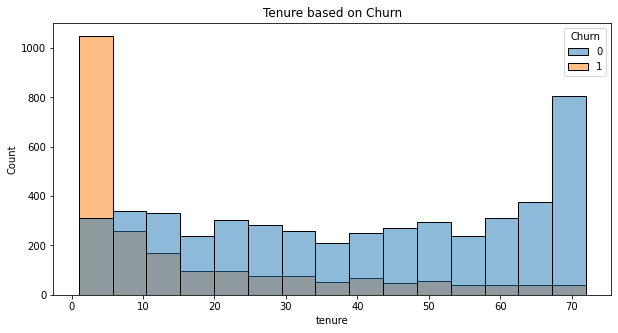

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x='tenure',data=df,hue='Churn')
plt.title('Tenure based on Churn')
plt.show()

In [ ]:
len(df_churn[df_churn["Contract_Month-to-month"] == 1].index)/len(df_churn.index)

0.8923076923076924

In [ ]:
len(df_churn[df_churn["InternetService_DSL"] == 1].index)/len(df_churn.index)

0.651131221719457

In [ ]:
len(df_churn[df_churn["InternetService_Fiber optic"] == 0].index)/len(df_churn.index)

0.7628959276018099

# Déterminer `X` et `y` en vue d'utilisation d'un algorithme de Machine Learning.

In [ ]:
X = df.drop(columns = ["customerID", "MultipleLines", "InternetService", "Contract", "PaymentMethod", "Churn"])

y = df["Churn"]

In [ ]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,1,0,0,0,0,1,29.85,29.850000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,34,1,1,0,1,0,0,0,0,56.95,1889.500000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,0,2,1,1,1,0,0,0,0,1,53.85,108.150002,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,0,45,0,1,0,1,1,0,0,0,42.30,1840.750000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1,0,0,0,2,1,0,0,0,0,0,0,1,70.70,151.649994,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,0,1,1,1,1,1,84.80,1990.500000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,1,0,1,1,72,1,0,1,1,0,1,1,1,103.20,7362.899902,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,1,0,1,1,11,0,1,0,0,0,0,0,1,29.60,346.450012,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,0,1,1,0,4,1,0,0,0,0,0,0,1,74.40,306.600006,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(X)

PCA()

In [ ]:
pca.explained_variance_ratio_

array([9.99860419e-01, 1.22133783e-04, 1.66781258e-05, 7.89267124e-08,
       6.43673503e-08, 6.20095209e-08, 6.06919402e-08, 5.22074981e-08,
       4.87286136e-08, 4.52319265e-08, 4.23947409e-08, 4.02729767e-08,
       3.90704365e-08, 3.49986693e-08, 3.12119852e-08, 2.87520098e-08,
       2.69125887e-08, 2.53046792e-08, 2.40812004e-08, 2.14054175e-08,
       1.89931912e-08, 1.71027571e-08, 6.42904071e-09, 9.40276784e-33,
       9.40276784e-33, 9.40276784e-33, 9.40276784e-33, 9.40276772e-33])

In [ ]:
pd.DataFrame(pca.components_.T, index =X.columns, columns = [f'PC{i}' for i in range(1, int(X.shape[1]) + 1)])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28
gender,-1.031395e-08,0.000342,0.000400,0.003554,0.013676,0.019783,0.015751,-0.132800,-0.976741,0.124786,-0.078709,0.054404,1.767456e-02,0.010602,0.029737,0.016336,-0.002071,-0.022405,-0.018214,0.002814,0.012746,0.013168,0.004255,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-2.729069e-16
SeniorCitizen,1.666451e-05,0.002871,0.002243,-0.158243,-0.019108,-0.082206,-0.076754,0.058440,-0.012986,0.019568,0.014965,-0.065496,-7.764692e-04,-0.090673,0.255486,0.150646,0.235341,0.604882,-0.010855,0.081884,0.624878,-0.193667,0.034526,-7.266347e-16,-1.165743e-15,-1.288224e-15,2.299345e-15,-6.829939e-16
Partner,7.033659e-05,-0.003387,0.006696,0.107159,0.008366,0.277146,0.431921,0.507718,-0.070615,-0.027288,0.014367,-0.100062,1.943383e-02,-0.055646,0.178059,0.150280,0.152500,0.376187,-0.093943,0.025550,-0.462066,0.076009,-0.000936,3.034647e-16,7.723521e-16,-4.391078e-16,1.493132e-16,4.506453e-16
Dependents,1.305015e-05,-0.003912,0.001975,0.206178,0.018547,0.288515,0.419315,0.374131,-0.028835,-0.036630,-0.029664,-0.045981,2.764942e-02,0.061760,-0.059931,-0.082589,-0.169554,-0.396429,0.017029,-0.053989,0.583023,-0.094313,-0.003131,3.965228e-17,-2.513273e-16,1.421253e-16,-4.648084e-17,-7.490107e-17
tenure,8.942154e-03,-0.441954,0.896713,-0.001169,-0.002784,-0.005305,-0.011401,-0.000080,0.000367,-0.002238,0.000002,0.001319,5.601026e-03,0.007755,0.009176,0.004611,-0.004002,-0.006906,-0.004723,-0.000731,-0.000992,-0.006594,-0.000404,-2.488740e-19,1.169495e-17,-1.903087e-17,2.174436e-17,-1.027247e-17
PhoneService,1.473586e-05,0.002652,0.001507,0.065065,-0.419052,-0.064814,0.132274,-0.081490,-0.000144,-0.000894,-0.025543,-0.042712,4.828077e-02,0.010730,-0.133986,-0.026243,0.094716,0.006162,-0.001684,-0.007879,-0.048392,-0.217260,0.331108,1.944881e-01,2.300215e-01,4.710557e-01,4.656635e-01,-2.655721e-01
OnlineSecurity,8.230408e-05,0.000637,0.000502,0.199410,0.269496,0.107553,-0.026299,-0.103042,-0.017202,-0.154593,0.004725,-0.060734,3.577788e-01,0.051781,-0.285389,0.389209,-0.123052,0.131505,0.561642,0.046234,-0.072956,-0.341400,-0.036265,-1.041451e-16,-3.928547e-17,-8.891867e-17,5.635172e-17,1.617397e-17
OnlineBackup,1.069638e-04,0.002731,0.000726,0.063269,0.198804,0.027872,-0.072567,0.019291,-0.034863,-0.100717,0.034463,-0.190160,3.166780e-01,0.101841,0.229593,-0.792218,0.153960,0.077060,0.166319,-0.035699,-0.082728,-0.207580,0.043049,1.707711e-16,9.744022e-17,-6.947884e-17,4.553986e-17,1.173942e-16
DeviceProtection,1.095693e-04,0.003482,0.001904,0.108251,0.226814,0.120863,-0.062435,-0.034981,0.031881,0.058019,-0.029702,0.140731,-1.857957e-01,-0.095037,0.101241,0.160019,0.787547,-0.378737,0.053941,0.022213,-0.032124,-0.205243,0.048796,-2.920274e-17,-1.462791e-16,9.618608e-17,6.444662e-17,-1.657453e-16
TechSupport,8.666072e-05,0.001354,0.000224,0.216192,0.281682,0.163316,-0.055104,-0.145765,0.011173,-0.095386,-0.003080,0.050457,1.308065e-02,0.112966,-0.386351,-0.049506,-0.011080,0.191332,-0.713113,-0.021801,0.000519,-0.315085,-0.038910,4.964265e-17,9.499193e-17,9.327947e-18,-5.704697e-17,8.157261e-18


In [ ]:
X_Normalize= X[['tenure','MonthlyCharges','TotalCharges']]

In [ ]:
X = X.drop(columns =['tenure','MonthlyCharges','TotalCharges'])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_Normalize = scaler.fit_transform(X_Normalize)

In [ ]:
X_Normalize = pd.DataFrame(X_Normalize, columns = ['tenure','MonthlyCharges','TotalCharges'])

In [ ]:
X_Normalize

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457
...,...,...,...
7027,-0.343137,0.664868,-0.129180
7028,1.612573,1.276493,2.241056
7029,-0.872808,-1.170004,-0.854514
7030,-1.158016,0.319168,-0.872095


In [ ]:
X

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0,0,1,0,0,0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,1,1,0,1,0,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,0,1,1,1,0,0,0,0,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,0,0,1,0,1,1,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1,0,0,0,1,0,0,0,0,0,0,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,1,1,0,1,1,1,1,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,1,0,1,1,1,0,1,1,0,1,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,1,0,1,1,0,1,0,0,0,0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,0,1,1,0,1,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X=X.reset_index()

In [ ]:
X_New=pd.concat([X, X_Normalize],axis=1)
X_New = X_New.drop(columns =['index'])
X_New

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,1,0,1,0,0,0,1,0,0,0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.280248,-1.161694,-0.994194
1,0,0,0,0,1,1,0,1,0,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.064303,-0.260878,-0.173740
2,0,0,0,0,1,1,1,0,0,0,0,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.239504,-0.363923,-0.959649
3,0,0,0,0,0,1,0,1,1,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.512486,-0.747850,-0.195248
4,1,0,0,0,1,0,0,0,0,0,0,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.239504,0.196178,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,1,1,1,0,1,1,1,1,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.343137,0.664868,-0.129180
7028,1,0,1,1,1,0,1,1,0,1,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.612573,1.276493,2.241056
7029,1,0,1,1,0,1,0,0,0,0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.872808,-1.170004,-0.854514
7030,0,1,1,0,1,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.158016,0.319168,-0.872095


In [ ]:
pca = PCA(n_components=0.95)

pca.fit(X_New)

PCA(n_components=0.95)

In [ ]:
Xp = pca.transform(X_New)

In [ ]:
pca.explained_variance_ratio_

array([0.36228548, 0.15269485, 0.04845067, 0.03950895, 0.03746707,
       0.03529883, 0.03184574, 0.03105622, 0.02868575, 0.0270862 ,
       0.02576337, 0.02463453, 0.02290105, 0.02014375, 0.01809778,
       0.01696659, 0.01585602, 0.0149973 ])

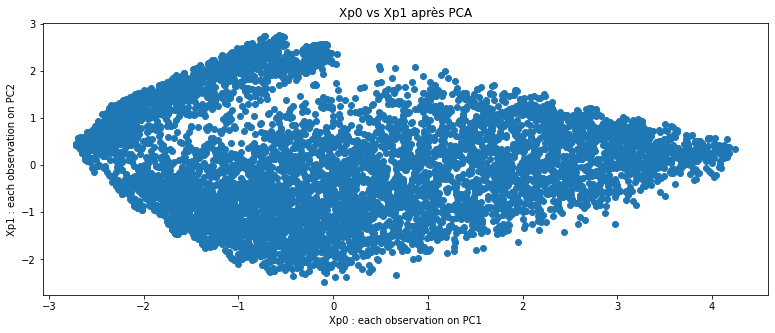

In [ ]:
plt.figure(figsize = (13,5))

plt.title("Xp0 vs Xp1 après PCA")
plt.xlabel('Xp0 : each observation on PC1')
plt.ylabel("Xp1 : each observation on PC2")
plt.scatter(Xp[:,0], Xp[:,1]);

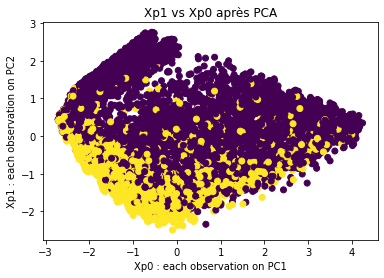

In [ ]:

plt.title("Xp1 vs Xp0 après PCA")
plt.xlabel('Xp0 : each observation on PC1')
plt.ylabel("Xp1 : each observation on PC2")
plt.scatter(Xp[:,0], Xp[:,1], c = y)

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 2)
km.fit(X)

KMeans(n_clusters=2)

In [ ]:
pd.DataFrame(Xp)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1.765885,-0.476762,-0.091903,-0.362247,1.382562,0.681362,0.978088,1.008813,-0.012416,-0.015485,-0.111858,0.224219,0.273882,0.321483,-0.488989,-0.158261,0.265178,0.204258
1,-0.355658,0.543161,1.238456,-0.267166,0.203459,-0.521389,-0.160738,-0.737997,0.655374,0.100605,0.278673,0.522839,0.119947,-0.055031,0.866118,-0.339807,-0.441302,0.312441
2,-1.725400,-0.740897,0.390301,0.664087,0.175811,-0.365620,-0.326660,-0.599194,-0.528363,0.121848,-0.573813,0.766274,0.849642,0.035010,-0.056892,0.080778,-0.220155,0.625837
3,-0.003535,1.050664,0.713365,-0.015304,1.870949,-0.392979,0.339672,-0.393584,0.559788,0.902165,0.003596,0.122646,-0.684634,-0.391169,0.553175,-0.235056,-0.117016,-0.311817
4,-1.639894,-1.353283,-0.193995,0.499209,-0.461341,-0.398569,0.077027,0.602871,-0.113561,-0.064707,-0.133109,0.304508,-0.036887,-0.440535,-0.006334,-0.133097,-0.136483,-0.091077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.663257,-0.494701,-0.043112,1.200216,0.197254,0.934206,-0.764242,-1.047544,1.026360,0.107214,-0.041224,-0.348978,0.707904,-0.613843,0.527090,-0.065971,0.033045,0.126830
7028,3.396909,0.388014,-0.046168,-0.199555,-0.391113,0.366664,-0.091774,0.331792,0.940519,-0.630189,-0.568809,-0.251251,0.215101,0.722591,-0.278348,-0.137899,-0.622181,-0.231625
7029,-1.521922,-0.057156,0.001314,-0.164375,1.318920,1.280172,0.938051,0.982706,-0.061700,-0.075722,-0.043584,0.230762,0.148238,-0.401859,0.390390,0.368712,-0.436048,0.186621
7030,-1.012140,-1.075889,-0.334185,-1.060768,0.144025,0.692147,-0.267269,-0.639411,-0.118504,0.044353,-0.327806,-0.113455,0.637998,0.301233,0.662452,-0.001087,0.851767,0.245983


Text(0, 0.5, 'feature_2')

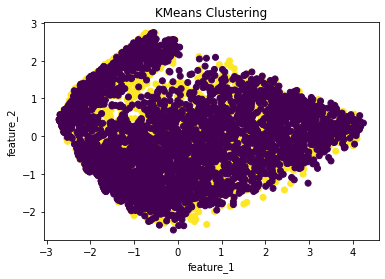

In [ ]:
plt.scatter(Xp[:,0],Xp[:,1], c = km.labels_)
plt.title("KMeans Clustering")
plt.xlabel("feature_1")
plt.ylabel("feature_2")

In [ ]:
df["KMeans_clusters"] = km.labels_
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,KMeans_clusters
0,7590-VHVEG,1,0,1,0,1,0,No phone service,Fiber optic,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.850000,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,5575-GNVDE,0,0,0,0,34,1,No,Fiber optic,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.500000,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.150002,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,7795-CFOCW,0,0,0,0,45,0,No phone service,Fiber optic,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.750000,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
4,9237-HQITU,1,0,0,0,2,1,No,DSL,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.649994,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24,1,Yes,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.500000,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
7039,2234-XADUH,1,0,1,1,72,1,Yes,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.899902,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
7040,4801-JZAZL,1,0,1,1,11,0,No phone service,Fiber optic,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.450012,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
7041,8361-LTMKD,0,1,1,0,4,1,Yes,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.600006,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0


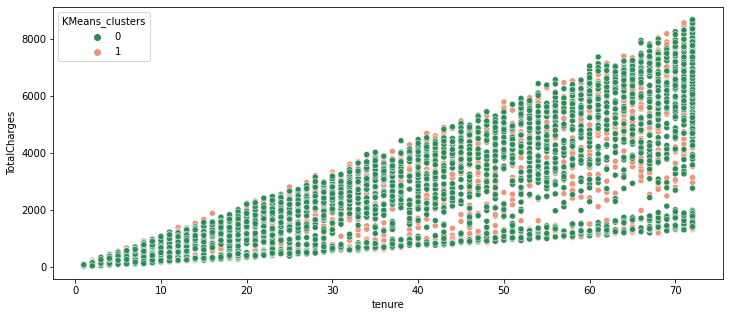

In [ ]:
plt.figure(figsize=(12,5))
sp = sns.scatterplot(data=df,
                     x='tenure', y='TotalCharges',hue='KMeans_clusters', palette=['seagreen','darksalmon'])
sp.set_title('');

On voit clairement que KMeans a distnguer deux profils, en fonctions de "TotalCharges".

In [ ]:
km = KMeans(n_clusters = 2)
km.fit(X_New)

KMeans(n_clusters=2)

In [ ]:
X_New["KMeans_clusters_X_scaled"] = km.labels_


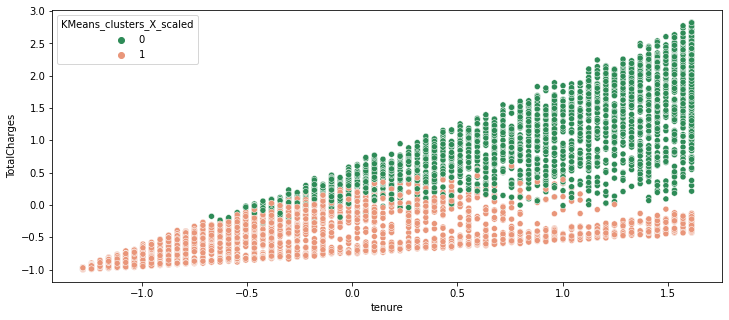

In [ ]:
plt.figure(figsize=(12,5))
sp = sns.scatterplot(data=X_New,
                     x='tenure', y='TotalCharges',hue='KMeans_clusters_X_scaled', palette=['seagreen','darksalmon'])
sp.set_title('');

On observe qu'après avoir standardisé les données, KMeans distingue des clusters en fonction de plusieurs variable, plutôt que seulement ["TotalCharges"]. Cependant, il semble que ce soit la variable qui est le plus d'impact pour KMeans.

In [ ]:
X_New["Churn"] = df["Churn"]

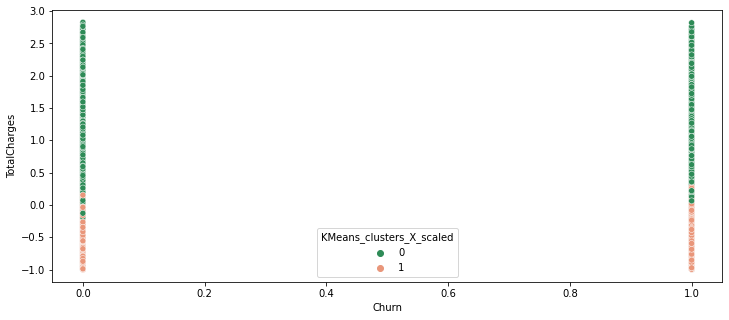

In [ ]:
plt.figure(figsize=(12,5))
sp = sns.scatterplot(data=X_New,
                     x='Churn', y='TotalCharges',hue='KMeans_clusters_X_scaled', palette=['seagreen','darksalmon'])
sp.set_title('');

In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(max_iter = 10000000, class_weight= "balanced")

In [ ]:
y.value_counts()

0    4822
1    2210
Name: Churn, dtype: int64

In [ ]:
X_New = X_New.drop(columns = ["KMeans_clusters_X_scaled", "Churn"])


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_New, y, test_size = 0.3, random_state = 2, stratify = y)

X_New

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,1,0,1,0,0,0,1,0,0,0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.280248,-1.161694,-0.994194
1,0,0,0,0,1,1,0,1,0,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.064303,-0.260878,-0.173740
2,0,0,0,0,1,1,1,0,0,0,0,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.239504,-0.363923,-0.959649
3,0,0,0,0,0,1,0,1,1,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.512486,-0.747850,-0.195248
4,1,0,0,0,1,0,0,0,0,0,0,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.239504,0.196178,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,1,1,1,0,1,1,1,1,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.343137,0.664868,-0.129180
7028,1,0,1,1,1,0,1,1,0,1,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.612573,1.276493,2.241056
7029,1,0,1,1,0,1,0,0,0,0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.872808,-1.170004,-0.854514
7030,0,1,1,0,1,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.158016,0.319168,-0.872095


In [ ]:
log.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000000)

In [ ]:
log.score(X_test, y_test)

0.866824644549763

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

knn.score(X_test, y_test)

0.8507109004739336

In [ ]:
log.coef_

array([[-1.52848438e-02,  2.56844381e-01, -2.87930217e-02,
        -1.50708643e-01, -7.70793321e-01, -8.81638676e-01,
        -2.33182605e-01, -4.63547087e-01, -8.34762420e-01,
        -5.95683205e-01, -3.96867010e-01,  8.61852782e-02,
        -2.35036922e-01,  7.70914709e-01, -5.35756399e-01,
         1.67730710e+00, -2.26124743e+00,  5.84061713e-01,
         7.13464025e-01, -1.28580636e-01, -5.84762001e-01,
        -1.49886399e-01, -4.48156653e-02,  1.93303478e-01,
         1.51997420e-03, -2.78988369e+00,  1.60291321e+00,
         1.95753000e+00]])

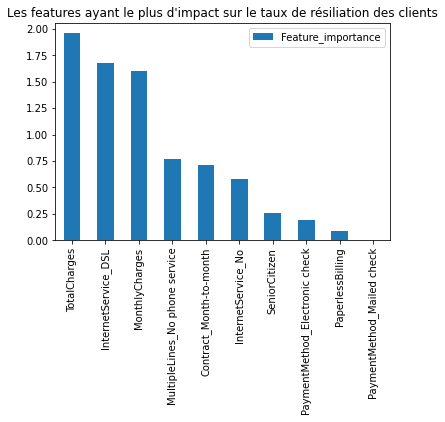

In [ ]:
weights = pd.DataFrame(log.coef_[0],
                 index=X_New.columns.values)

weights.columns = ["Feature_importance"]

weights.sort_values(by = "Feature_importance", ascending = False).head(10).plot(kind='bar')
plt.title("Les features ayant le plus d'impact sur le taux de résiliation des clients");